## Question 1
### Draw an example (of your own invention) of a partition of two-dimensional feature space that could result from recursive binary splitting. Your example should contain at least six regions. Draw a decision tree corresponding to this partition. Be sure to label all aspects of your figures, including the regions (R1, R2...) and the cut points (t1, t2...).

## Here is the partition of two-dimensional feature space(X1, X2)

![](regions.png)

## Here is the decision tree corresponding to the partition.

![](decision_tree.png)

## Question 2
### In this exercise we will use regression trees and related approaches to predict the quantitative variable `sales` from the `carseat` dataset.
- (a) Split the data set into a training set and a test set.
- (b) Fit a regression tree to the training set. Plot the tree and interpret the results. What test MSE do you obtain?
- (c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?
- (d) Use the bagging approach in order to analyze this data. What test MSE do you obtain?
- (e) Use random forests to analyze this data. What test MSE do you obtain?
- (f) Report the important features in your random forest. One can do this by using importance() function in R or feature_importance_ on a fitted model in sklearn in python.
- (g) Describe the effect of m (the number of variables considered at each split) on the error rate.

In [1]:
import pandas as pd

carseat_df = pd.read_csv("carseat.csv", index_col=[0])

In [2]:
carseat_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


#### Use dummy column to represent  categorical data column

In [3]:
data = pd.get_dummies(carseat_df, drop_first=True)

In [4]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
1,9.50,138,73,11,276,120,42,17,0,0,1,1
2,11.22,111,48,16,260,83,65,10,1,0,1,1
3,10.06,113,35,10,269,80,59,12,0,1,1,1
4,7.40,117,100,4,466,97,55,14,0,1,1,1
5,4.15,141,64,3,340,128,38,13,0,0,1,0


In [5]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [6]:
X.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
1,138,73,11,276,120,42,17,0,0,1,1
2,111,48,16,260,83,65,10,1,0,1,1
3,113,35,10,269,80,59,12,0,1,1,1
4,117,100,4,466,97,55,14,0,1,1,1
5,141,64,3,340,128,38,13,0,0,1,0


In [7]:
y.head()

1     9.50
2    11.22
3    10.06
4     7.40
5     4.15
Name: Sales, dtype: float64

In [8]:
print(carseat_df.shape)
print(X.shape)
print(y.shape)

(400, 11)
(400, 11)
(400,)


#### (a) Split the data set into a training set and a test set.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=666)

#### (b) Fit a regression tree to the training set. Plot the tree and interpret the results. What test MSE do you obtain?

In [10]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(criterion="mse", random_state=666)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=666, splitter='best')

In [11]:
import graphviz 
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dt_model, out_file=None, 
                         feature_names=X.columns,  
                         class_names="Sales",  
                         filled=True, rounded=True,  
                         special_characters=True) 

graph = graphviz.Source(dot_data) 
graph.render("carSales_Tree") 


'carSales_Tree.pdf'

In [12]:
# graph

#### This tree is so big that it cannot be displayed properly inside the block, that's why I save that tree as a pdf file. Attached please see the tree.

##### Interpret the results: 
##### I think that the size of this tree is caused by the continous responses. Unlike the classification problems where we only have acceptable number of classes, in order to predict the continous responses, we have to have that many leaves.

In [13]:
from sklearn.metrics import mean_squared_error

y_pred = dt_model.predict(X_test)
test_MSE = mean_squared_error(y_pred, y_test)

In [14]:
print("The test MSE is: ", test_MSE)

The test MSE is:  5.386675999999999


#### (c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?

#### Here I choose max_leaf_nodes as the tree complexity

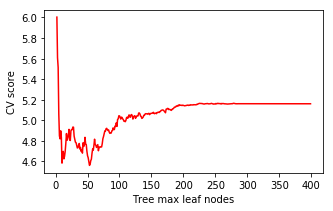

In [15]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,3))
plt.xlabel("Tree max leaf nodes")
plt.ylabel("CV score")
leaf_nums = list(range(2,400))
test_MSE_list = []
for leaf_num in leaf_nums:
    dt_model = DecisionTreeRegressor(max_leaf_nodes=leaf_num, random_state=666)
    neg_cv_score = cross_val_score(dt_model, X, y, cv=5,scoring='neg_mean_squared_error').mean()
    test_MSE_list.append(-neg_cv_score)

  
plt.plot(leaf_nums, test_MSE_list, 'r-')
plt.show()


#### As we can see from the figure above, the test MSE first decrease then increase as the Tree complexity increses. It tells us that pruning the tree does improve the test MSE, however, we cannot prune it too much. That's the trade-off.


#### (d) Use the bagging approach in order to analyze this data. What test MSE do you obtain?


In [16]:
from sklearn.ensemble import BaggingRegressor

bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10, random_state=666)
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
bagging_test_mse = mean_squared_error(y_pred, y_test)
print("The bagging approach test MSE is: ", bagging_test_mse)

The bagging approach test MSE is:  2.7283930599999984


c:\program files\python37\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


#### (e) Use random forests to analyze this data. What test MSE do you obtain?


In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor().fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_test_mse = mean_squared_error(y_pred, y_test)
print("The random forests test MSE is: ", rf_test_mse)

The random forests test MSE is:  3.1214852099999995


#### (f) Report the important features in your random forest. 


In [18]:
pd.DataFrame(rf.feature_importances_.reshape(1,11), columns=X.columns)

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,0.121318,0.044518,0.110527,0.040701,0.315687,0.074246,0.02492,0.215775,0.043153,0.003873,0.005282


#### (g) Describe the effect of m (the number of variables considered at each split) on the error rate.

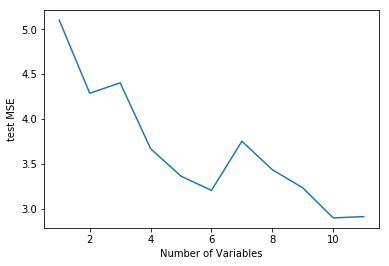

In [24]:
number_of_variables_list = list(range(1,12))
rf_test_mse_list = []
for number_of_variables in number_of_variables_list:
    rf = RandomForestRegressor(max_features=number_of_variables,random_state=666).fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rf_test_mse = mean_squared_error(y_pred, y_test)
    rf_test_mse_list.append(rf_test_mse)
    
plt.xlabel("Number of Variables")
plt.ylabel("test MSE")
plt.plot(number_of_variables_list, rf_test_mse_list)
plt.show()

In [31]:
pd.DataFrame(rf_test_mse_list,index=number_of_variables_list,columns=["test MSE"])

,test MSE
1,5.100275
2,4.285813
3,4.402024
4,3.667576
5,3.360585
6,3.202487
7,3.750584
8,3.433082
9,3.230758
10,2.895225


#### Changing m will get us different random forests, sequentially we have different test MSE. The lowest test MSE is attained when m=10 which is better than the default setting.